# 🌳 Decision Trees – Intuitive & Mathematical Understanding

---

## 1️⃣ What is a Decision Tree?

A **Decision Tree** is a supervised learning algorithm that makes decisions by **splitting data step-by-step** based on feature conditions.

It works like a **flowchart**:
- **Root Node** → first decision
- **Internal Nodes** → feature-based conditions
- **Leaf Nodes** → final prediction (output)

👉 Decision Trees can be used for:
- **Classification** (output is categorical: Yes / No)
- **Regression** (output is continuous: numbers)

---

## 2️⃣ Decision Tree for Classification vs Regression

### 🔹 Decision Tree Classification
- Output is **categorical**
- Uses **purity measures** to decide splits:
  - **Entropy**
  - **Gini Impurity**
- Uses **Information Gain** to choose the best feature

### 🔹 Decision Tree Regression
- Output is **continuous**
- ❌ Cannot use Entropy / Gini / Information Gain
- ✅ Uses **Variance Reduction** to select the best split
- Prediction at a leaf = **average of values in that leaf**

---

## 3️⃣ How Decision Trees Split the Data

### 🌿 Categorical Features
- Easy to split directly by category  
  Example: Outlook = Sunny / Rain / Overcast

### 🌿 Numerical Features
Splitting happens using **thresholds**:

Steps:
1. Sort the feature values
2. Try different thresholds (e.g., 2, 2.5, 3.6)
3. Split data into:
   - Left: ≤ threshold
   - Right: > threshold
4. Choose the best threshold using:
   - **Information Gain** (classification)
   - **Variance Reduction** (regression)

---

## 4️⃣ Purity Measures (Classification)

### 🔸 Entropy
Measures **uncertainty** in a node.

$$
H(S) = - \sum p_i \log_2 p_i
$$

- Entropy = 0 → **Pure node**
- Entropy = 1 → **Impure node**
- Values always lie between **0 and 1**

---

### 🔸 Gini Impurity
Measures how often a randomly chosen sample would be misclassified.

$$
G = 1 - \sum p_i^2
$$

- Gini = 0 → **Pure split**
- Maximum value = 0.5 (binary classification)

---

## 5️⃣ Entropy vs Gini Impurity

| Aspect | Entropy | Gini |
|------|--------|------|
| Uses log | Yes | No |
| Computational cost | Higher | Lower |
| Dataset size | Small datasets | Large datasets |
| sklearn default | ❌ | ✅ (CART) |

👉 **sklearn uses Gini Impurity by default**

---

## 6️⃣ Information Gain (Feature Selection)

Information Gain tells us **which feature to split on first**.

$$
Gain(S, f) = H(S) - \sum \frac{|S_v|}{|S|} H(S_v)
$$

Where:
- $H(S)$ → Entropy of parent
- $H(S_v)$ → Entropy of child nodes

📌 **Feature with highest Information Gain is selected**

---

## 7️⃣ Variance Reduction (Regression Trees)

Since output is continuous, we use **Variance Reduction**.

### 🔹 Variance Formula:
$$
Var = \frac{1}{n} \sum (y - \bar{y})^2
$$

### 🔹 Variance Reduction:
$$
VR = Var(root) - \sum w_i \cdot Var(child_i)
$$

- $w_i$ → ratio of samples in child
- Choose split with **maximum variance reduction**

---

## 8️⃣ Leaf Node Prediction (Regression)

In Decision Tree Regression:
- Leaf node output = **average of values**
- Example:
  - Leaf values = [52, 60, 56]
  - Prediction = (52 + 60 + 56) / 3 = **56**

---

## 9️⃣ Tree Construction Approach

- Decision Trees are built **Top → Down**
- Greedy algorithm (best split at each step)
- Stops when:
  - Node becomes pure
  - No features left
  - Stopping criteria met

---

## 🔟 Overfitting in Decision Trees

Decision Trees tend to **overfit**:
- High training accuracy
- Low test accuracy
- High variance model

---

## 1️⃣1️⃣ Pruning Techniques (Overfitting Control)

### ✂️ Pre-Pruning (Early Stopping)
- Stop tree growth **while constructing**
- Use hyperparameters:
  - `max_depth`
  - `min_samples_split`
  - `max_features`
- Preferred for **large datasets**

---

### ✂️ Post-Pruning
- Build **full tree first**
- Then remove unnecessary nodes
- Used mainly for **small datasets**

---

## 1️⃣2️⃣ CART vs ID3

| Aspect | ID3 | CART |
|-----|----|------|
| Splits | Multi-way | Binary only |
| Criterion | Entropy | Gini / MSE |
| sklearn | ❌ | ✅ |
| Regression support | ❌ | ✅ |

👉 **sklearn DecisionTree uses CART algorithm**

---

## 🎯 Key Takeaways

- Decision Trees are **easy to interpret**
- Handle **non-linear relationships**
- Require **no feature scaling**
- Prone to **overfitting**
- Foundation for:
  - Random Forest 🌲🌲
  - Gradient Boosting 🚀
  - XGBoost / LightGBM


In [ ]:
# pandas → used for data manipulation and working with tabular datasets (DataFrames)
import pandas as pd

# matplotlib → used for creating plots and visualizations
import matplotlib.pyplot as plt

# numpy → used for numerical operations and array/matrix computations
import numpy as np


In [ ]:
# load_iris → built-in dataset from scikit-learn
# Commonly used for classification and decision tree demonstrations
from sklearn.datasets import load_iris


In [ ]:
# Load the Iris dataset into a dictionary-like object
# This object contains:
# - data → feature values
# - target → class labels
# - feature_names → names of input features
# - target_names → names of output classes (Setosa, Versicolor, Virginica)
iris_dataset = load_iris()


In [ ]:
# Print the full description of the Iris dataset
# This shows:
# - Dataset background
# - Feature details (sepal/petal measurements)
# - Target class information
# - Number of samples and features
print(iris_dataset['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# Create a DataFrame for feature values (input variables - Independent features)
# iris_dataset['data'] → numerical feature matrix
# Column names describe the physical measurements of the flower:
# - Sepal length and width
# - Petal length and width
X = pd.DataFrame(
    iris_dataset['data'],
    columns=[
        'sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm'
    ]
)


In [7]:
# Extract the target labels (output variable - Dependent Features)
# Each value represents the flower class:
# 0 → Setosa
# 1 → Versicolor
# 2 → Virginica
y = iris_dataset['target']


In [ ]:
# Import function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing subsets
# X → feature DataFrame (sepal and petal measurements)
# y → target labels (flower classes)
# test_size=0.2 → 20% of data is reserved for testing, 80% for training
# random_state=10 → ensures the same data split every time for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [ ]:
# Import DecisionTreeClassifier used for building a classification decision tree
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree Classifier object
# By default:
# - criterion = "gini" → uses Gini Impurity to measure split quality
# - max_depth = None → tree grows until all leaves are pure or stopping conditions are met
# - random_state = None → results may vary between runs
tree_classifier = DecisionTreeClassifier()

In [40]:
# Train (fit) the Decision Tree Classifier using the training data
# X_train → feature values used to learn decision rules (splits)
# y_train → corresponding class labels (Setosa, Versicolor, Virginica)
# The model builds the tree top-down by choosing splits that maximize purity at each node
tree_classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


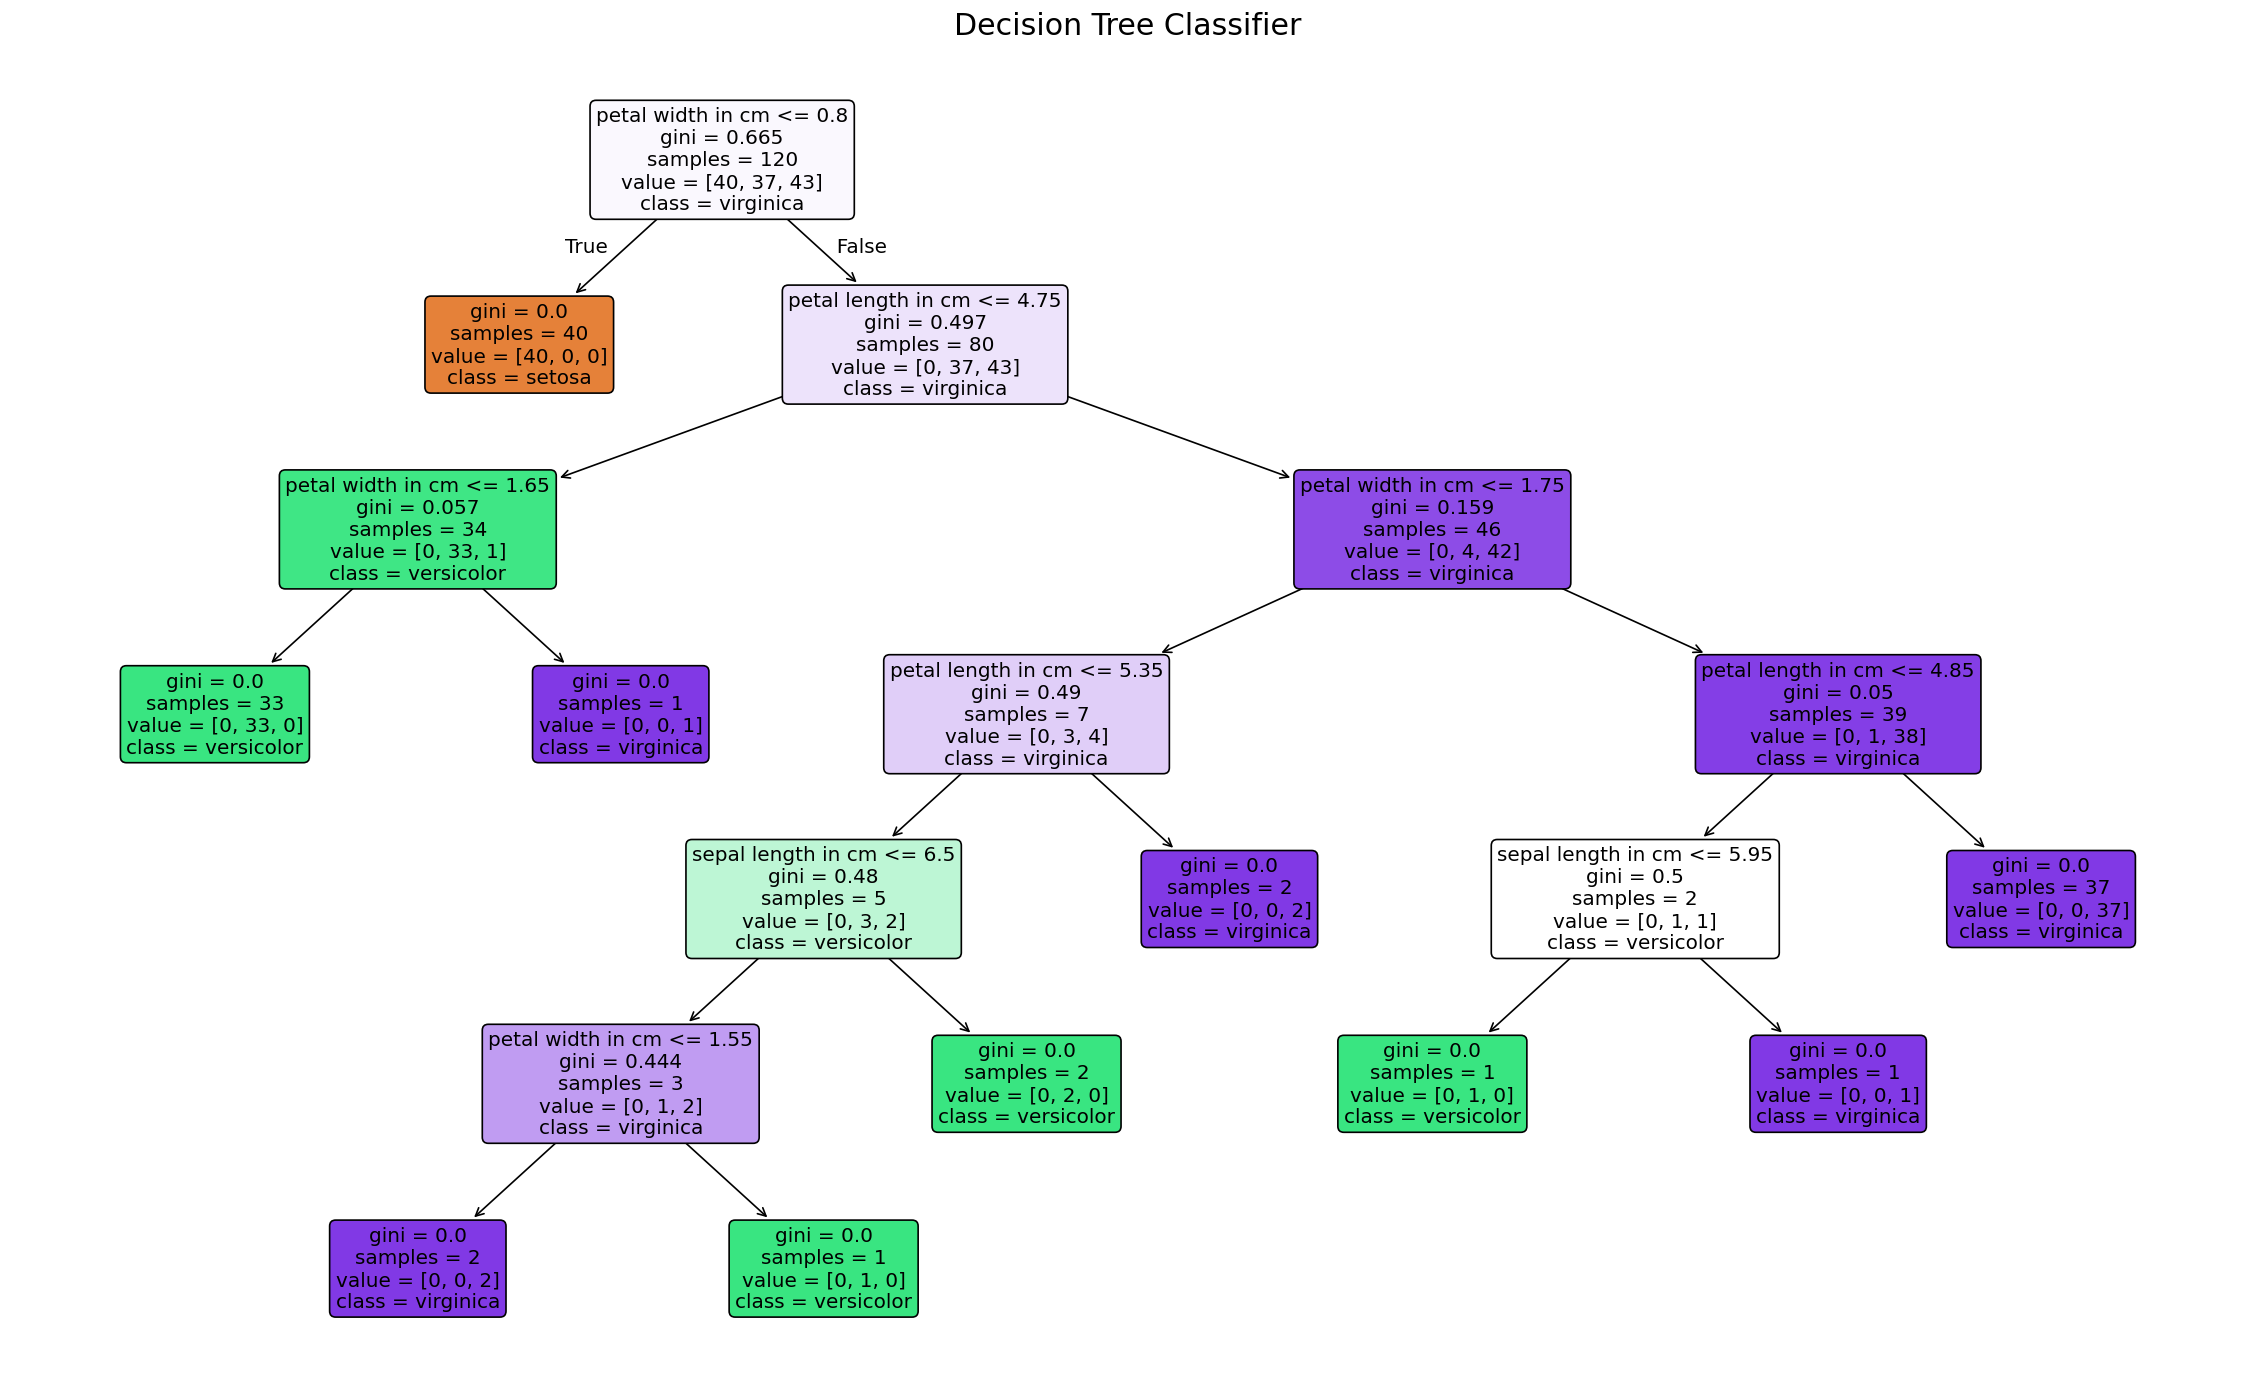

In [16]:
# -----------------------------------------------
# Beautified Decision Tree Visualization
# -----------------------------------------------

from sklearn.tree import plot_tree

# Create a large, high-resolution figure
plt.figure(figsize=(24, 14), dpi=120)

# Plot a cleaner and more readable tree
plot_tree(
    tree_classifier,
    feature_names=X.columns,
    class_names=iris_dataset['target_names'],
    filled=True,          # Color nodes based on class purity
    rounded=True,        # Rounded corners for a modern look
    fontsize=12,         # Bigger font for readability
)

# Add a clear title
plt.title("Decision Tree Classifier", fontsize=18, pad=20)

# Display the plot
plt.show()


# ✂️ Post-Pruning in Decision Trees (Cost Complexity Pruning)

---

## 🔹 1. What is Post-Pruning?

**Post-Pruning** means:
> First, grow a **fully grown decision tree**, then **cut back unnecessary branches** to improve generalization.

Instead of stopping the tree early, we:
- Let it **overfit**
- Then **simplify it** afterward

---

## 🔹 2. Why Do We Need Post-Pruning?

A fully grown tree:
- Has **very high training accuracy**
- But performs poorly on **unseen data**
- Learns **noise instead of patterns**

This leads to:
> **Overfitting**

Post-pruning helps by:
- Removing splits that do not improve test performance
- Making the tree **simpler and more robust**

---

## 🔹 3. Key Idea (Intuition)

> “If removing a subtree does not significantly reduce performance, remove it.”

We trade:
- A little training accuracy
- For much better **generalization**

---

## 🔹 4. Cost Complexity Pruning (Used in scikit-learn)

Scikit-learn uses a method called **Minimal Cost Complexity Pruning**.

It introduces a parameter called:

$$
\alpha \quad (\text{ccp\_alpha})
$$

---

## 🔹 5. Meaning of Alpha $α$

$$
\text{Cost} = \text{Error} + \alpha \times \text{Number of Leaves}
$$

Where:
- **Error** → misclassification error
- **Number of Leaves** → tree complexity
- **α (alpha)** → penalty for complexity

---

## 🔹 6. Effect of Alpha

| Alpha Value | Tree Shape | Behavior |
|------------|-----------|----------|
| α = 0 | Full tree | Overfits |
| Small α | Slightly pruned | Balanced |
| Large α | Heavily pruned | Underfits |

📌 Alpha controls the **bias–variance tradeoff**

---

## 🔹 7. How Post-Pruning Works (Step-by-Step)

1. Train a **full decision tree**
2. Generate a list of possible **alpha values**
3. Train multiple trees using different alpha values
4. Evaluate performance on validation data
5. Choose alpha with **best test accuracy**
6. Final tree = **best pruned tree**

---

## 🔹 8. Why Post-Pruning is Powerful

- Uses **actual performance** to decide pruning
- Does not rely on heuristics
- Often produces **better trees than pre-pruning**

---

## 🔹 9. Post-Pruning vs Pre-Pruning

| Aspect | Pre-Pruning | Post-Pruning |
|--------|------------|--------------|
| When pruning happens | During training | After training |
| Tree growth | Limited | Full growth |
| Accuracy | May stop too early | More optimal |
| Compute cost | Low | Higher |
| Performance | Good | Often better |

---

## 🔹 10. When to Use Post-Pruning

Use post-pruning when:
✅ Dataset is small or medium  
✅ Accuracy is critical  
✅ You can afford extra computation  

Avoid when:
❌ Dataset is very large  
❌ Training speed is critical  

---

## 🎯 Final Takeaway

Post-pruning:
- Builds a **full tree first**
- Then simplifies it using **alpha (ccp_alpha)**
- Controls overfitting
- Improves generalization
- Produces **cleaner, more interpretable trees**


## ✅ Step 1 — Generate Alpha Values (Pruning Path)
This step finds all possible pruning strengths that scikit-learn can apply to your trained tree.

#### 🧠 What This Does (Simple Words)
- Scikit-learn analyzes your full tree
- It calculates:
    - Where branches can be cut
    - What alpha values would cause those cuts
    - Returns a list of candidate alphas

In [17]:
# -----------------------------------------------
# Step 1: Get Cost-Complexity Pruning Path
# -----------------------------------------------

# Generate pruning path for the trained tree
# This finds all effective alpha values where pruning can happen
path = tree_classifier.cost_complexity_pruning_path(X_train, y_train)

# Extract alpha values (pruning strengths)
ccp_alphas = path.ccp_alphas

# Display the alpha values
print("🔹 Available CCP Alpha Values:")
print(ccp_alphas)


🔹 Available CCP Alpha Values:
[0.         0.00811966 0.00952381 0.01605882 0.01617647 0.2544123
 0.33395833]


### ✅ Step 2 — Train Pruned Trees for Each Alpha

#### 🧠 What This Does (Simple Words)
- Each `alpha` controls how much pruning happens
- We train:
    - A slightly different tree for each `alpha`
    - Later, we’ll compare:
        > Which tree generalizes best on test data

In [18]:
# -----------------------------------------------
# Step 2: Train Decision Trees for Each Alpha
# -----------------------------------------------

from sklearn.tree import DecisionTreeClassifier

# List to store all trained trees
pruned_trees = []

# Train a tree for each alpha value
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(
        random_state=10,
        ccp_alpha=alpha
    )
    
    # Train the pruned tree
    tree.fit(X_train, y_train)
    
    # Store the trained model
    pruned_trees.append(tree)

# Confirm how many trees were trained
print("🔹 Number of pruned trees trained:", len(pruned_trees))


🔹 Number of pruned trees trained: 7


#### 🔍 What This Means
If you had:
 - 10 alpha values
 
You now have:
 - 10 different trees

From full tree → very simple tree

### ✅ Step 3 — Evaluate Each Pruned Tree

#### 🧠 What This Does (Simple Words)
For every tree:
- We test it on:
    - Training data
    - Testing data
- This shows:
    - Overfitting (high train, low test)
    - Underfitting (low both)
    - Best balance (peak test accuracy)

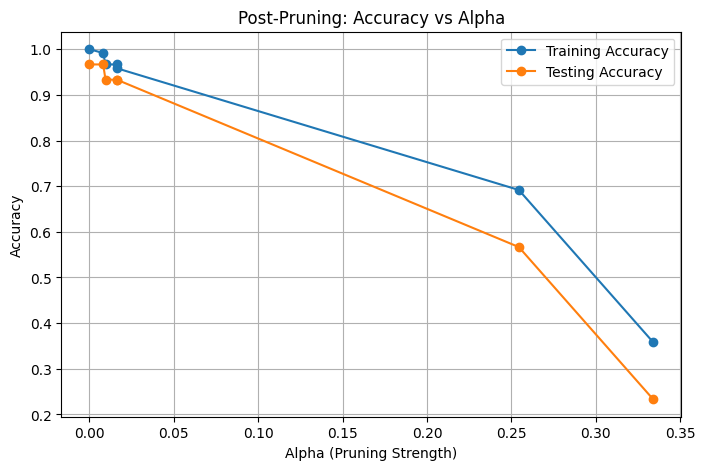

In [19]:
# -----------------------------------------------
# Step 3: Evaluate Accuracy for Each Alpha
# -----------------------------------------------

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []

# Evaluate each pruned tree
for tree in pruned_trees:
    # Training accuracy
    y_train_pred = tree.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    
    # Testing accuracy
    y_test_pred = tree.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# -----------------------------------------------
# Plot Accuracy vs Alpha
# -----------------------------------------------

plt.figure(figsize=(8, 5))

plt.plot(ccp_alphas, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(ccp_alphas, test_accuracies, marker='o', label="Testing Accuracy")

plt.xlabel("Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Post-Pruning: Accuracy vs Alpha")
plt.legend()
plt.grid(True)

plt.show()


### 🔍 How to Read This Plot
You should see:
- Left side (small alpha)
    - Training accuracy ≈ 1.0
    - Testing accuracy lower
        👉 Overfitting
- Middle region
    - Training and testing accuracy closer
    - Testing accuracy peaks
    👉 Best model
- Right side (large alpha)
    - Both accuracies drop
    👉 Underfitting

### ✅ Step 4 — Select Best Alpha & Train Final Tree

In [20]:
# -----------------------------------------------
# Step 4: Select Best Alpha (Peak Test Accuracy)
# -----------------------------------------------

import numpy as np

# Find index of the highest testing accuracy
best_alpha_index = np.argmax(test_accuracies)

# Get the corresponding best alpha value
best_alpha = ccp_alphas[best_alpha_index]

print("🔹 Best CCP Alpha:", best_alpha)
print("🔹 Best Testing Accuracy:", test_accuracies[best_alpha_index])


🔹 Best CCP Alpha: 0.0
🔹 Best Testing Accuracy: 0.9666666666666667


### ✅ Step 5 — Train Final Pruned Tree

In [21]:
# -----------------------------------------------
# Step 5: Train Final Pruned Decision Tree
# -----------------------------------------------

from sklearn.tree import DecisionTreeClassifier

# Create the final pruned tree using the best alpha
final_pruned_tree = DecisionTreeClassifier(
    random_state=10,
    ccp_alpha=best_alpha
)

# Train the model
final_pruned_tree.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### ✅ Step 6 — Visualize Final Pruned Tree

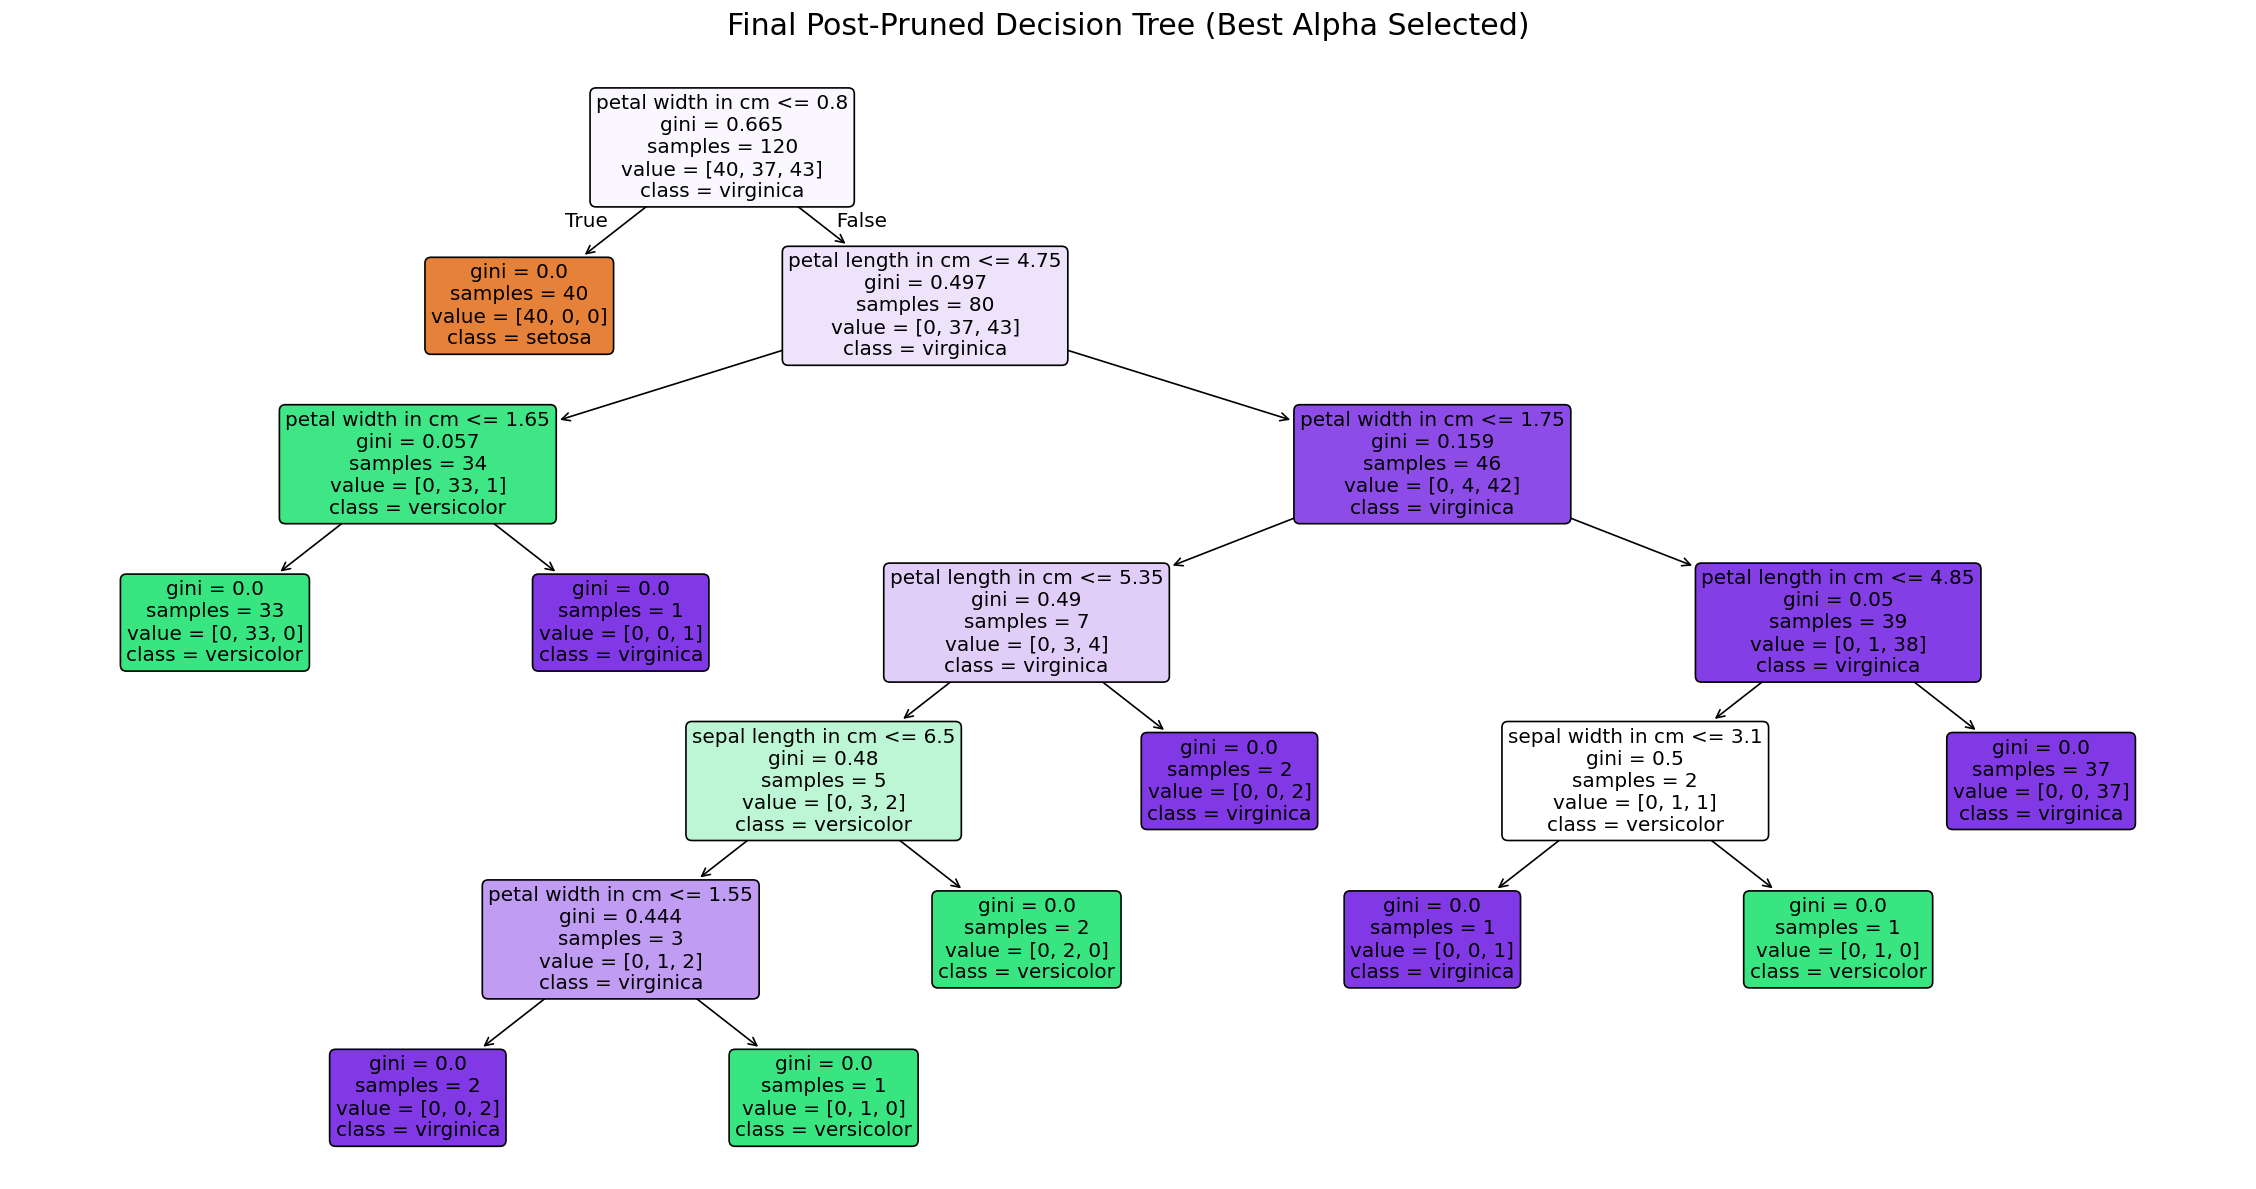

In [22]:
# -----------------------------------------------
# Step 6: Visualize Final Pruned Tree
# -----------------------------------------------

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12), dpi=120)

plot_tree(
    final_pruned_tree,
    feature_names=X.columns,
    class_names=iris_dataset['target_names'],
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("Final Post-Pruned Decision Tree (Best Alpha Selected)", fontsize=18, pad=20)
plt.show()


In [23]:
# -----------------------------------------------
# Evaluation Metrics for Decision Tree Classifier
# -----------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------------------------
# 1️⃣ Make Predictions on Test Data
# -----------------------------------------------

# Predict class labels for the test dataset
# X_test → unseen feature values
y_pred = final_pruned_tree.predict(X_test)

# -----------------------------------------------
# 2️⃣ Accuracy Score
# -----------------------------------------------

# Accuracy = (Correct Predictions) / (Total Predictions)
accuracy = accuracy_score(y_test, y_pred)

print("🔹 Accuracy Score:")
print(accuracy)

# -----------------------------------------------
# 3️⃣ Confusion Matrix
# -----------------------------------------------

# Generate confusion matrix
# Rows → Actual classes
# Columns → Predicted classes
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix into a DataFrame for better readability
cm_df = pd.DataFrame(
    cm,
    index=iris_dataset['target_names'],
    columns=iris_dataset['target_names']
)

print("\n🔹 Confusion Matrix:")
display(cm_df)

# -----------------------------------------------
# 4️⃣ Classification Report
# -----------------------------------------------

# Shows detailed metrics for each class:
# - Precision → How many predicted positives were actually correct
# - Recall → How many actual positives were correctly predicted
# - F1-score → Balance between precision and recall
# - Support → Number of samples for each class
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris_dataset['target_names']))


🔹 Accuracy Score:
0.9666666666666667

🔹 Confusion Matrix:


,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,12,1
virginica,0,0,7



🔹 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# ✂️ Pre-Pruning in Decision Trees (Early Stopping)

---

## 🔹 1. What is Pre-Pruning?

**Pre-Pruning** means:
> We stop the tree from growing **while it is being built** instead of cutting it later.

Instead of:
- Growing a full tree
- Then pruning it

We:
- **Limit growth from the start**

---

## 🔹 2. Why Do We Need Pre-Pruning?

A fully grown tree:
- Fits training data extremely well
- Often learns **noise instead of patterns**
- Performs poorly on unseen data

Pre-pruning helps by:
- Keeping the tree **simple**
- Reducing overfitting
- Improving **generalization**

---

## 🔹 3. Core Idea (Intuition)

> “If a split is too small or too deep to be meaningful, don’t make it.”

We prevent the tree from:
- Creating tiny branches
- Memorizing individual samples

---

## 🔹 4. Key Hyperparameters for Pre-Pruning

### 1️⃣ `max_depth`
- Maximum depth of the tree
- Controls how many levels of splits are allowed

| Value | Effect |
|------|--------|
| Small | Shallow tree (underfitting) |
| Large | Deep tree (overfitting) |

---

### 2️⃣ `min_samples_split`
- Minimum samples required to split a node
- Prevents splitting very small groups

---

### 3️⃣ `min_samples_leaf`
- Minimum samples required in a leaf node
- Forces leaves to represent **groups, not individuals**

---

### 4️⃣ `max_features`
- Maximum number of features considered at each split
- Adds randomness
- Reduces overfitting

---

## 🔹 5. How Pre-Pruning Controls Overfitting

It limits:
- Tree depth
- Node size
- Feature selection

This reduces:
- Model complexity
- Sensitivity to noise

---

## 🔹 6. Pre-Pruning vs Post-Pruning

| Aspect | Pre-Pruning | Post-Pruning |
|--------|------------|--------------|
| When applied | During training | After training |
| Speed | Faster | Slower |
| Tree quality | Heuristic | Data-driven |
| Overfitting control | Good | Often better |
| Scalability | Better for large data | Better for small data |

---

## 🔹 7. When to Use Pre-Pruning

Use pre-pruning when:
✅ Dataset is large  
✅ Training speed matters  
✅ Model must be simple  
✅ You want predictable tree size  

Avoid when:
❌ Dataset is very small  
❌ Accuracy is more important than simplicity  

---

## 🎯 Final Takeaway

Pre-pruning:
- Stops tree growth early
- Controls complexity during training
- Prevents memorization
- Improves generalization
- Makes trees **faster and cleaner**


In [27]:
# -----------------------------------------------
# Hyperparameter Grid for Pre-Pruning (GridSearch)
# -----------------------------------------------

params = {
    # criterion → metric used to measure split quality
    # "gini"      → Gini Impurity (default, fast)
    # "entropy"  → Information Gain (slower, more theoretical)
    # "log_loss" → Logarithmic loss (probability-based impurity)
    'criterion': ['gini', 'entropy', 'log_loss'],

    # splitter → strategy to choose the split at each node
    # "best"   → chooses the best possible split (deterministic)
    # "random" → chooses a random split (adds randomness, may reduce overfitting)
    'splitter': ['best', 'random'],

    # max_depth → maximum depth of the tree
    # Controls model complexity:
    # Small value → underfitting
    # Large value → overfitting
    'max_depth': [1, 2, 3, 4, 5],

    # max_features → number of features considered at each split
    # "auto" → considers all features (can lead to overfitting)
    # "sqrt" → considers sqrt(total_features) at each split (common in trees/forests)
    # "log2" → considers log2(total_features) at each split (more randomness)
    'max_features': ['auto', 'sqrt', 'log2']
}


#### 🧠 What This Grid Is Doing (Big Picture)
This tells GridSearch:

Try different ways to control tree growth early and find the best balance between:
- Accuracy
- Simplicity
- Generalization

In [28]:
# GridSearchCV → used for hyperparameter tuning
# It tests all combinations of the given parameter grid using cross-validation
# and selects the model with the best validation performance
from sklearn.model_selection import GridSearchCV


In [ ]:
# Create a base Decision Tree Classifier
# This model will be used as the estimator for GridSearch
tree_classifier = DecisionTreeClassifier()

# Setup GridSearchCV for hyperparameter tuning (Pre-Pruning)
# tree_classifier → base model to tune
# param_grid=params → dictionary of hyperparameters to try
# cv=5 → 5-fold cross-validation (splits training data into 5 parts for validation)
# scoring='accuracy' → metric used to select the best model
grid = GridSearchCV(tree_classifier, param_grid=params, cv=5, scoring='accuracy')

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Run GridSearchCV on the training data
# This will:
# - Train multiple Decision Trees using different hyperparameter combinations
# - Perform 5-fold cross-validation for each combination
# - Measure accuracy for each model
# - Select the model with the best average validation accuracy
grid.fit(X_train, y_train)


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [33]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
# Display the best hyperparameter combination found by GridSearchCV
# This shows the values that gave the highest cross-validated accuracy
best_params = grid.best_params_

print("🔹 Best Pre-Pruning Hyperparameters:")
for param, value in best_params.items():
    print(f"{param} → {value}")

🔹 Best Pre-Pruning Hyperparameters:
criterion → entropy
max_depth → 3
max_features → sqrt
splitter → best


### ✅ Let’s Do Step 1 — Prediction (Tuned Model)

In [ ]:
# -----------------------------------------------
# Step 1: Make Predictions Using Best GridSearch Model
# -----------------------------------------------

# Use the best model found by GridSearchCV
best_prepruned_tree = grid.best_estimator_

# Predict on the test dataset
y_pred_prepruned = best_prepruned_tree.predict(X_test)

### ✅ Step 2 — Evaluation Metrics for Pre-Pruned Tree

In [36]:
# -----------------------------------------------
# Evaluation Metrics for Pre-Pruned Decision Tree
# -----------------------------------------------

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# -----------------------------------------------
# 1️⃣ Accuracy Score
# -----------------------------------------------

# Accuracy = (Correct Predictions) / (Total Predictions)
accuracy_prepruned = accuracy_score(y_test, y_pred_prepruned)

print("🔹 Pre-Pruned Tree Accuracy:")
print(accuracy_prepruned)

# -----------------------------------------------
# 2️⃣ Confusion Matrix
# -----------------------------------------------

# Rows → Actual classes
# Columns → Predicted classes
cm = confusion_matrix(y_test, y_pred_prepruned)

# Convert to DataFrame for clean display
cm_df = pd.DataFrame(
    cm,
    index=iris_dataset['target_names'],
    columns=iris_dataset['target_names']
)

print("\n🔹 Pre-Pruned Tree Confusion Matrix:")
display(cm_df)

# -----------------------------------------------
# 3️⃣ Classification Report
# -----------------------------------------------

# Shows:
# - Precision
# - Recall
# - F1-score
# - Support for each class
print("\n🔹 Pre-Pruned Tree Classification Report:")
print(classification_report(y_test, y_pred_prepruned, target_names=iris_dataset['target_names']))


🔹 Pre-Pruned Tree Accuracy:
0.9666666666666667

🔹 Pre-Pruned Tree Confusion Matrix:


,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,13,0
virginica,0,1,6



🔹 Pre-Pruned Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



###✅ Step 3 — Train the Final “Locked” Pre-Pruned Tree
We’ll now rebuild a clean model using the best hyperparameters from GridSearch.

This ensures:
- Reproducibility
- Clarity
- Production-ready code

In [37]:
# -----------------------------------------------
# Step 3: Train Final Pre-Pruned Decision Tree
# -----------------------------------------------

from sklearn.tree import DecisionTreeClassifier

# Create a new Decision Tree using the best hyperparameters
final_prepruned_tree = DecisionTreeClassifier(
    **grid.best_params_,
    random_state=10
)

# Train the final model on training data
final_prepruned_tree.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### ✅ Step 4 — Visualize Final Pre-Pruned Tree

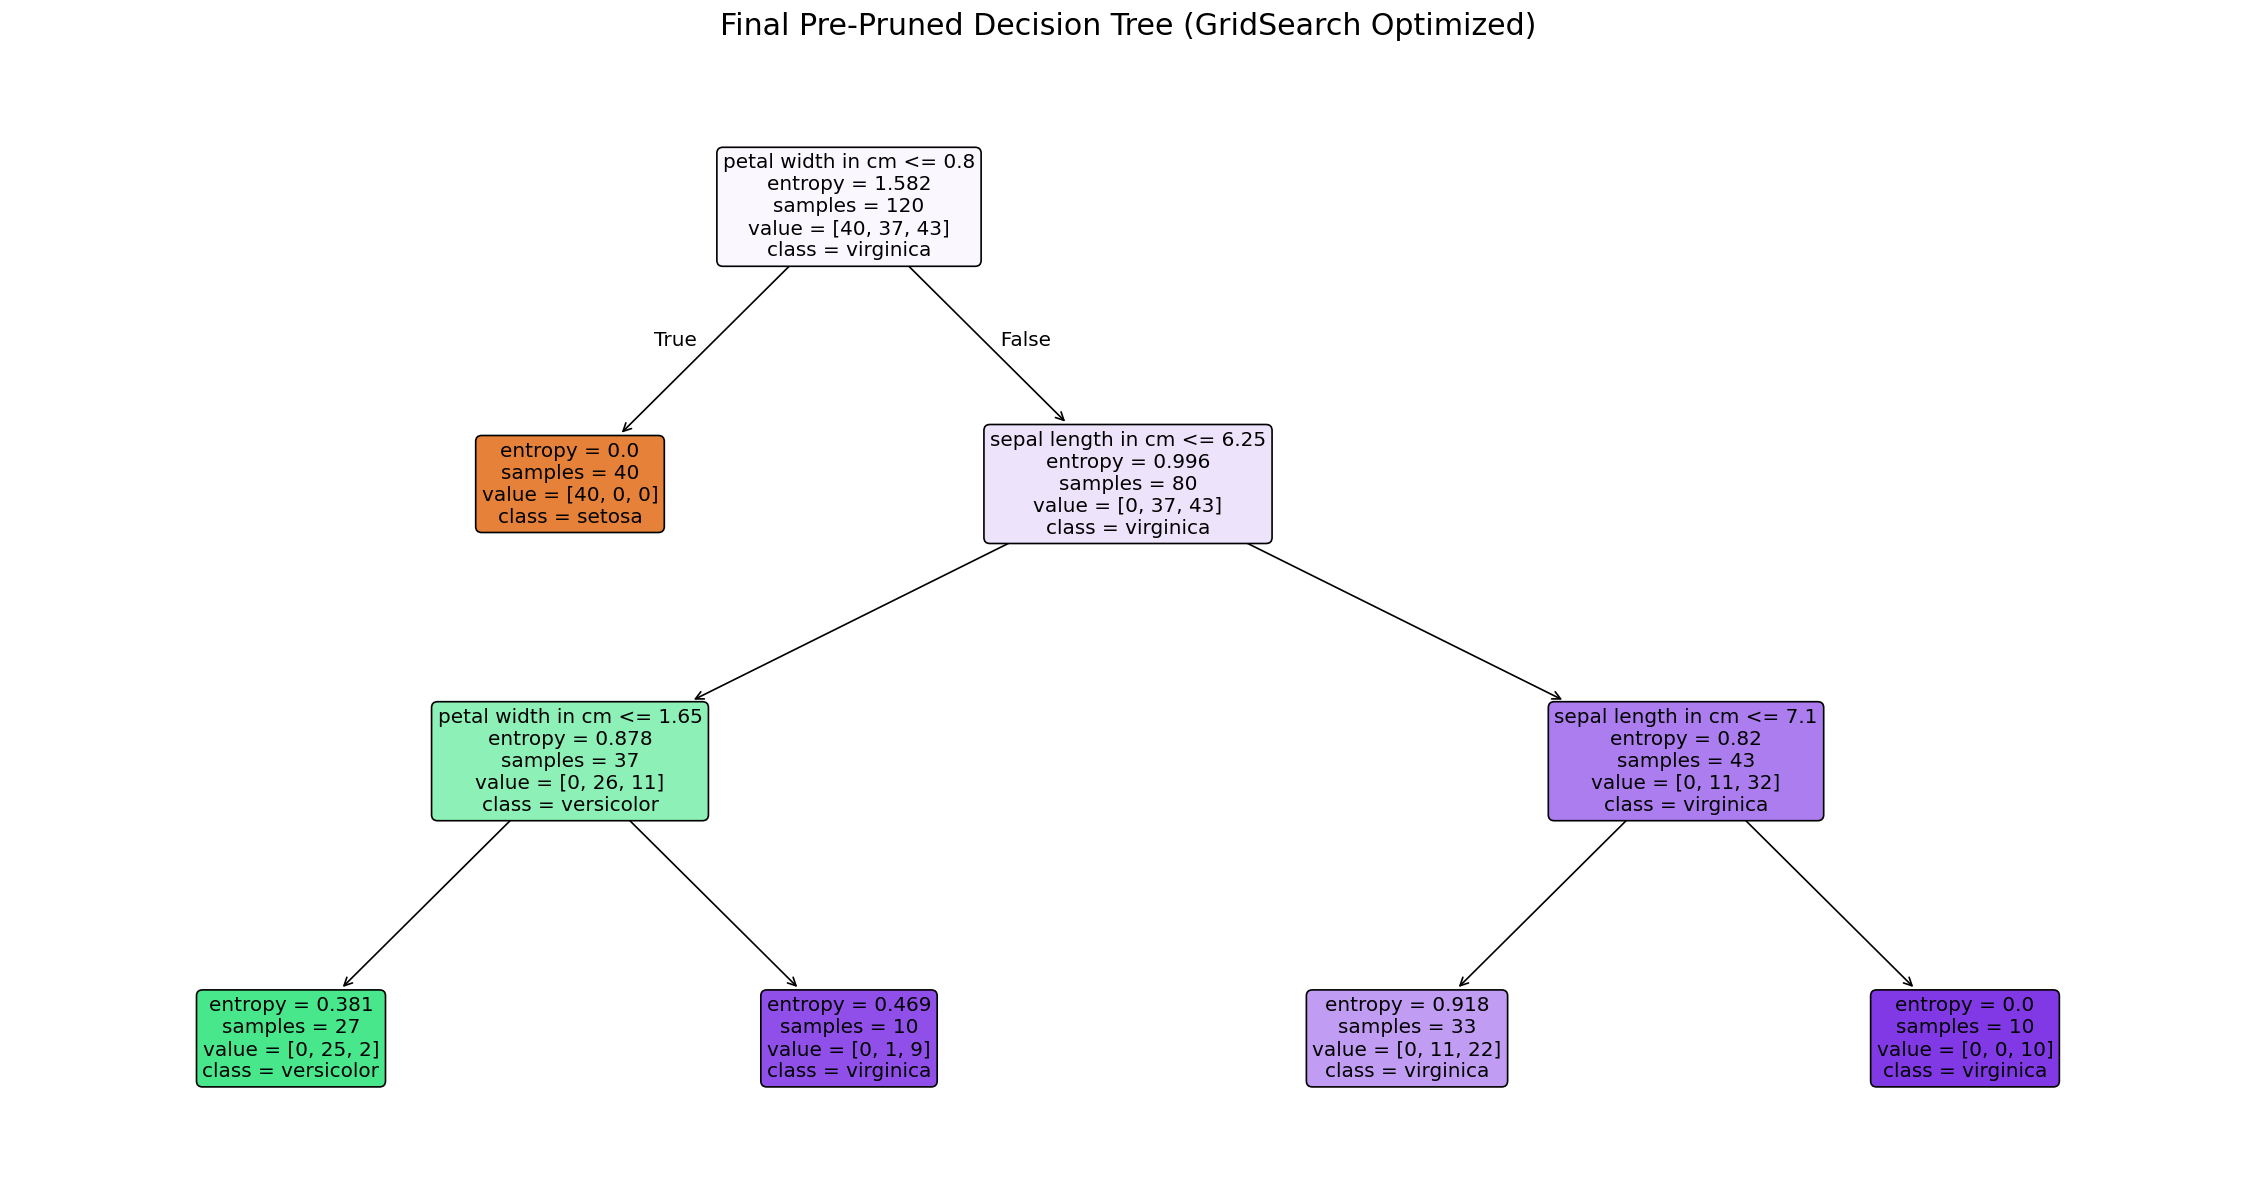

In [ ]:
# -----------------------------------------------
# Step 4: Visualize Final Pre-Pruned Tree
# -----------------------------------------------

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12), dpi=120)

plot_tree(
    final_prepruned_tree,
    feature_names=X.columns,
    class_names=iris_dataset['target_names'],
    filled=True,
    rounded=True,
    fontsize=12
   
)

plt.title("Final Pre-Pruned Decision Tree (GridSearch Optimized)", fontsize=18, pad=20)
plt.show()


### ✅ Step 5 — Compare All Three Models (Quantitative + Structural)

We’ll compare:
- Unpruned Tree
- Post-Pruned Tree
- Pre-Pruned Tree

Across:
- Accuracy
- Tree Depth
- Number of Nodes

In [41]:
# -----------------------------------------------
# Step 5: Compare All Trees
# -----------------------------------------------

from sklearn.metrics import accuracy_score

# Make predictions for each model
y_pred_unpruned = tree_classifier.predict(X_test)
y_pred_postpruned = final_pruned_tree.predict(X_test)
y_pred_prepruned_final = final_prepruned_tree.predict(X_test)

# Build comparison table
comparison_df = pd.DataFrame({
    "Model": ["Unpruned Tree", "Post-Pruned Tree", "Pre-Pruned Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_unpruned),
        accuracy_score(y_test, y_pred_postpruned),
        accuracy_score(y_test, y_pred_prepruned_final)
    ],
    "Tree Depth": [
        tree_classifier.get_depth(),
        final_pruned_tree.get_depth(),
        final_prepruned_tree.get_depth()
    ],
    "Number of Nodes": [
        tree_classifier.tree_.node_count,
        final_pruned_tree.tree_.node_count,
        final_prepruned_tree.tree_.node_count
    ]
})

print("🔹 Decision Tree Model Comparison:")
display(comparison_df)


🔹 Decision Tree Model Comparison:


,Model,Accuracy,Tree Depth,Number of Nodes
0,Unpruned Tree,1.000000,6,19
1,Post-Pruned Tree,0.966667,6,19
2,Pre-Pruned Tree,0.900000,3,9
